In [1]:
import sys
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('../MachineLearningCourse/train.csv', index_col=['Id'])
test_data = pd.read_csv('../MachineLearningCourse/test.csv', index_col=['Id'])


In [3]:
test_data.shape

(1459, 79)

In [4]:
train_data.shape

from sklearn.model_selection import train_test_split

train_labels = train_data.pop('SalePrice')

features = pd.concat([train_data, test_data], keys=['train_data', 'test_data'])

# I decided to get rid of features that have more than half of missing information or do not correlate to SalePrice
features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

In [5]:
# features, x_test, y_train, y_test = train_test_split(train_no_sale_price, train_sale_price, test_size = 0.3, random_state=4330)

In [6]:
# check if split was successfull
# print(features.shape[0] == y_train.shape[0])

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
###### --------- THERE ARE INCOMPLETE DATA FROM DATASET (NA -> NAN -> AND SO ON)
# features.isnull()

In [9]:
##### FEATURE TUNING AND REPRESENTATION:
# Long story short -> where we see that we can encode category data will do it, with label encoder when we have some kind
# of data power unit (this can be done by brutforce change of data with numeric reprewsentation); when data does not
# handle some kind of power meaning will be used one-hot-encoder
# 
# When there aren't any data representing feature then they will be tune with std, average or will create new feature with
# appropriate data when possible

In [10]:
# !!!!!!!!!!!!!!!!!! Think of which feature you can get rid off


In [11]:
# feature MSSubClass is numeric but better to be categorical data, so as that been said will transofrm it to string
features['MSSubClass'] = features['MSSubClass'].astype(str)

# MSZoning is little more tricky, here will assume something like kNN algorithm and will get most frequently type
# think of how with kNN we can get correct type???
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

features['LotFrontage'] = features['LotFrontage'].fillna(features['LotFrontage'].mean())

# Assume that if no data in Alley, there is no alley there - add new value inaccessible 
features['Alley'] = features['Alley'].fillna('Unaccessible');

# TRY WITH CONDITIONS AS STINGSSS
# features.OverallCondition = features.OverallCondition.astype(str)



In [12]:
#new_list = [expression(i) for i in old_list if filter(i)]
# [element for element in features.MasVnrType.isnull() if element]
# features.MasVnrType.isnull()

In [13]:
# features['MasVnrType'].mode()[0]

In [14]:
def fill_bsmnt_data(data):
    for element in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[element] = data[element].fillna('NoBasement')
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)

In [15]:
def fill_garage_data(data_frame):
    for element in ('GarageType', 'GarageFinish', 'GarageQual'):
        data_frame[element] = data_frame.fillna('NoGarage')
    data_frame['GarageCars'] = data_frame['GarageCars'].fillna(0)

In [16]:
# features['TotalBsmtSF']

In [17]:
# Little of data in MasVnrType is without data so fill it with most frequantly value will handle it
features['MasVnrType'] = features['MasVnrType'].fillna(features['MasVnrType'].mode()[0])


# no data for basement will be treaten like there is no basement at all , so new value will be introduse to our model NoBasement
fill_bsmnt_data(features)

# same as previously data we fill with frequently one
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])

features['KitchenAbvGr'] = features['KitchenAbvGr'].astype(str)

features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])

features['FireplaceQu'] = features['FireplaceQu'].fillna('NonFireplacement')

fill_garage_data(features)

features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

features['YrSold'] = features['YrSold'].astype(str)

features['MoSold'] = features['MoSold'].astype(str)

# add new feature that will show overall area of appartment, if there is no data for component which is in calculation fill with 0
# features['TotalBsmtSF'] = features['TotalBsmtSF'].fillna(0.0)
# features['1stFlrSF'] = features['1stFlrSF'].fillna(0)
# features['2ndFlrSF'] = features['2ndFlrSF'].fillna(0)

# create new feature
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)



In [18]:
# drop some more features and if no good from this return and alter them
# features.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
#                'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
#                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
#               axis=1, inplace=True)

# features.drop('Utilities', axis=1, inplace=True)

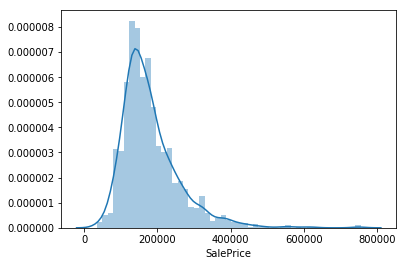

In [19]:
# check data from vector that need to be our result one
sns.distplot(train_labels)

In [20]:
# it have right tail squeezed (something like chi square distribution with k = 3)
# To make data more normal will make transformation by logarithm
train_labels = np.log(train_labels)

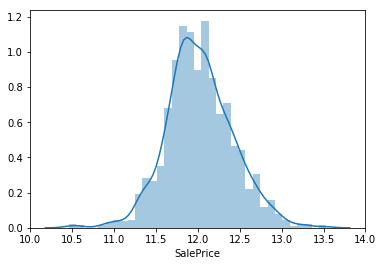

In [21]:
# will plot it again to see if there is some result 
sns.distplot(train_labels)

In [22]:
# after transforming our "label" set we will continue with our feature "massage, some of ideas are get from here **https://www.biomedware.com/files/documentation/boundaryseer/Preparing_data/Methods_for_data_standardization.htm**



In [23]:
# features

In [24]:
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

In [25]:
# Getting Dummies from Condition1 and Condition2
conditions = set([x for x in features['Condition1']] + [x for x in features['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(features.index), len(conditions))),
                       index=features.index, columns=conditions)
for i, cond in enumerate(zip(features['Condition1'], features['Condition2'])):
    dummies.ix[i, cond] = 1
features = pd.concat([features, dummies.add_prefix('Condition_')], axis=1)
features.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in features['Exterior1st']] + [x for x in features['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(features.index), len(exteriors))),
                       index=features.index, columns=exteriors)
for i, ext in enumerate(zip(features['Exterior1st'], features['Exterior2nd'])):
    dummies.ix[i, ext] = 1
features = pd.concat([features, dummies.add_prefix('Exterior_')], axis=1)
features.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

# Getting Dummies from all other categorical vars
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [26]:
features.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'TotalSF'],
      dtype='object')

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

In [29]:
# print((features.values == 'Abnorml').sum())

# col_idx = pd.np.argmax(features.values == 'Abnorml', axis=1).max()

# features.iloc[:, col_idx].value_counts()

In [30]:
# features.describe().size

# features.dtypes

In [31]:
# will label Encode categorical data, and will standardizing numeric data

# IF HAVE NO SUCECSS TRY TO  RETURN QUALITY AND CONDITION TO NUMERIC + MAKE CONDITION STRINGS TO NUMBBERS

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
# clf = RandomForestClassifier().fit(features.describe(), y_train[:features.describe().size - 1])

In [34]:
# from sklearn.linear_model import LogisticRegression

# #regression = LogisticRegression().fit(features, y_train)

# numeric = features.describe().columns
# # regression = LogisticRegression().fit(features[numeric], y_train)



# from sklearn.linear_model import LinearRegression

# model = LinearRegression()

In [35]:
# model.fit(features[numeric], y_train)

In [36]:
# model.score(features[numeric], y_train)

In [37]:
categorical_columns = features.dtypes[features.dtypes == 'object'].index

In [38]:
categorical_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenAbvGr', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
encoders = {col: LabelEncoder().fit(features[col]) for col in categorical_columns}


def encode_categorical(data, columns, encoders):
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)


train_encoded = encode_categorical(features, categorical_columns, encoders)

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
# one_hot_encoder = OneHotEncoder().fit(train_encoded)

In [ ]:
one_hot_features = one_hot_encoder.transform(encode_categorical(features[categorical_columns], categorical_columns,
                                                               encoders))

In [ ]:
# cat_regression = LinearRegression().fit(one_hot_features, y_train)

# print(cat_regression.score(one_hot_features, y_train))

# one_hot_x_test = one_hot_encoder.transform(encode_categorical(x_test[categorical_columns], categorical_columns, encoders))
# print(cat_regression.score(one_hot_x_test, y_test))

In [ ]:


### Copying features
features_standardized = features.copy()

### Replacing numeric features by standardized values
features_standardized.update(numeric_features_standardized)


In [ ]:
### Splitting features
train_features = features.loc['train_data'].select_dtypes(include=[np.number]).values
test_features = features.loc['test_data'].select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st = features_standardized.loc['train_data'].select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test_data'].select_dtypes(include=[np.number]).values

In [ ]:


### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)



In [ ]:
from sklearn.linear_model import LinearRegression

cat_regression = LinearRegression().fit(x_train, y_train)

In [ ]:
cat_regression.score(x_train, y_train)

In [ ]:
from sklearn.linear_model import Lasso


alpha = [0.0000000000000001, 0.000001, 0.0001, 0.1, 1]

for a in alpha:
    all_data_lr = Lasso(alpha = a).fit(x_train, y_train)
    print('alpha:', a)
    print(all_data_lr.score(x_train, y_train), all_data_lr.score(x_test, y_test))
    print()